# 10分鐘搞定 pandas (10 MINUTES TO PANDAS) @RWEPA

Title  : 10 MINUTES TO PANDAS

Date   : 2017.10.26

Update : 2019.11.16

File   : 10m_pandas.ipynb

Author : Ming-Chang Lee

Email  : alan9956@gmail.com

RWEPA  : http://rwepa.blogspot.tw/

Source : https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

# 1. Jupyter Notebook 快速鍵

- cell切換: Cell \ Cell Type \ {Code, Markdown}
- 編輯cell, cell 最左側為綠色bar
- 按 [Esc], cell 最左側為藍色bar
- 按 [x]：刪除當前選擇的cell
- 按 [a]：在當前選擇的上方新增一個cell
- 按 [b]：在當前選擇的下方新增一個cell
- 按 [Shift] + [Enter]：執行當前的cell並且選到下一個cell
- 按 [Ctrl] + [Enter]：執行當前cell
- 按 [M]：轉換成 markerdown 模式，可以看到紅色框框內容從code變成markerdown

# 2. Anaconda 套件管理

- 尋找套件 conda search matplotlib
- 列出已安装的模組 conda list
- 安裝模組 conda install 模組名稱
- 更新模組 conda update 模組名稱
- 更新所有的模組 conda update –all
- 刪除模組 conda remove 模組名稱

In [1]:
# 範例: 更新 Spyder 模組
# conda update anaconda # 先更新 anaconda 模組
# conda update spyder # 再更新 spyder

# 3. 變更工作目錄

In [2]:
import os

In [3]:
os.getcwd()

'C:\\00.data\\2.rdata_github_RWEPA'

In [4]:
os.chdir("C:/pythondata.shp") # 變更工作目錄

In [5]:
os.getcwd()

'C:\\pythondata.shp'

In [6]:
os.listdir(os.getcwd())

['foo.csv',
 'foo.h5',
 'foo.xlsx',
 'mapdata201907050833',
 'mapdata201907050833.zip',
 'mapdata201907311006',
 'mapdata201907311006.zip']

# 4. 載入3大套件 (pandas, numpy, matplotlib)

In [7]:
import pandas as pd # Python Data Analysis Library

In [8]:
import numpy as np # Python Scientific Computing Library 

In [9]:
import matplotlib.pyplot as plt # Python 2D Plotting library

# 5. pandas 物件簡介

# 5.1 Object Creation 建立物件

In [10]:
# 使用串列(List)建立 序列(Series) 物件, 序列包括指標(Index) 與值(Value), 指標採用預設整數型態指標

In [11]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [12]:
type(s)

pandas.core.series.Series

In [13]:
# 使用陣列(Array) 建立資料框(DataFrame)

In [14]:
dates = pd.date_range('20191101', periods=6) # 日期指標
dates

DatetimeIndex(['2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04',
               '2019-11-05', '2019-11-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # 文字欄位名稱
df

,A,B,C,D
2019-11-01,-0.825621,0.781337,0.994062,0.658648
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237
2019-11-03,-0.359479,0.829483,-1.579049,1.197485
2019-11-04,1.554257,-0.054961,-0.915349,0.762935
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817
2019-11-06,1.343814,0.180672,0.793786,-0.987014


In [17]:
# 使用字典建立資料框 DataFrame

In [18]:
df2 = pd.DataFrame({ 'A' : 1.,
    'B' : pd.Timestamp('20190101'),
    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
    'D' : np.array([3] * 4,dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2019-01-01,1.0,3,test,foo
1,1.0,2019-01-01,1.0,3,train,foo
2,1.0,2019-01-01,1.0,3,test,foo
3,1.0,2019-01-01,1.0,3,train,foo


In [19]:
df2.dtypes # df2. 按 [Tab] 按鈕

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 5.2 Viewing Data 資料檢視

In [20]:
df

,A,B,C,D
2019-11-01,-0.825621,0.781337,0.994062,0.658648
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237
2019-11-03,-0.359479,0.829483,-1.579049,1.197485
2019-11-04,1.554257,-0.054961,-0.915349,0.762935
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817
2019-11-06,1.343814,0.180672,0.793786,-0.987014


In [21]:
# 檢視前幾筆資料, 後幾筆資料, head 顯示前 5 筆資料, 此功能與 R 顯示 6 筆不相同.

In [22]:
df.head()

,A,B,C,D
2019-11-01,-0.825621,0.781337,0.994062,0.658648
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237
2019-11-03,-0.359479,0.829483,-1.579049,1.197485
2019-11-04,1.554257,-0.054961,-0.915349,0.762935
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817


In [23]:
df.tail(3)

,A,B,C,D
2019-11-04,1.554257,-0.054961,-0.915349,0.762935
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817
2019-11-06,1.343814,0.180672,0.793786,-0.987014


In [24]:
# 顯示指標(index), 欄名稱(columns), 資料值(values)

In [25]:
df.index

DatetimeIndex(['2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04',
               '2019-11-05', '2019-11-06'],
              dtype='datetime64[ns]', freq='D')

In [26]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [27]:
df.values

array([[-0.82562087,  0.7813369 ,  0.99406174,  0.65864838],
       [-1.50043372, -0.74599055, -0.32525525, -0.92323651],
       [-0.35947859,  0.8294832 , -1.57904918,  1.19748522],
       [ 1.55425713, -0.05496138, -0.91534853,  0.76293525],
       [-0.25778755, -0.64173701,  0.99987261, -0.25781728],
       [ 1.34381414,  0.18067245,  0.79378566, -0.98701413]])

In [28]:
# describe 統計摘要 statistic summary
# count 個數
# mean 平均值
# std  標準差 standard deviation, 一般希望愈小愈好
# min  最小值
# 25%  25百分位數
# 50%  50百分位數, 中位數 median
# 75%  75百分位數 (quantile)
# max  最大值

In [29]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.007542,0.058134,-0.005322,0.075167
std,1.212422,0.675610,1.100444,0.928331
min,-1.500434,-0.745991,-1.579049,-0.987014
25%,-0.709085,-0.495043,-0.767825,-0.756882
50%,-0.308633,0.062856,0.234265,0.200416
75%,0.943414,0.631171,0.943993,0.736864
max,1.554257,0.829483,0.999873,1.197485


In [30]:
# T 資料轉置, 類似將原本長資料 (Long data), 轉換為寬資料 (Wide data)
# 資料轉置
# | 1 2 3 4|
# | 5 6 7 8|
# 轉換為
# | 1 5|
# | 2 6|
# | 3 7|
# | 4 8|

In [31]:
df.T

,2019-11-01 00:00:00,2019-11-02 00:00:00,2019-11-03 00:00:00,2019-11-04 00:00:00,2019-11-05 00:00:00,2019-11-06 00:00:00
A,-0.825621,-1.500434,-0.359479,1.554257,-0.257788,1.343814
B,0.781337,-0.745991,0.829483,-0.054961,-0.641737,0.180672
C,0.994062,-0.325255,-1.579049,-0.915349,0.999873,0.793786
D,0.658648,-0.923237,1.197485,0.762935,-0.257817,-0.987014


In [32]:
# axis為排序的軸，0表示 rows index(列指標)，1表示columns index(行指標)，
# 當對數據 "列" 進行排序時，axis必須設置為0.
# df.sort(["A"]) 新版不支援 sort, 改用 sort_values 或 sort_index

In [33]:
df.sort_index(axis=1, ascending=False) # ascending =FALSE, 即遞增是FALSE, 表示遞減是TRUE

,D,C,B,A
2019-11-01,0.658648,0.994062,0.781337,-0.825621
2019-11-02,-0.923237,-0.325255,-0.745991,-1.500434
2019-11-03,1.197485,-1.579049,0.829483,-0.359479
2019-11-04,0.762935,-0.915349,-0.054961,1.554257
2019-11-05,-0.257817,0.999873,-0.641737,-0.257788
2019-11-06,-0.987014,0.793786,0.180672,1.343814


In [34]:
# 依照 B 欄大小, 由小至大排序

In [35]:
df.sort_values(by='B')

,A,B,C,D
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817
2019-11-04,1.554257,-0.054961,-0.915349,0.762935
2019-11-06,1.343814,0.180672,0.793786,-0.987014
2019-11-01,-0.825621,0.781337,0.994062,0.658648
2019-11-03,-0.359479,0.829483,-1.579049,1.197485


# 5.3 Selection 資料選取 .at, .iat, .loc, .iloc, .ix

In [36]:
# 5.3.1 Getting 選取行,列

In [37]:
# 選取行
df['A']

2019-11-01   -0.825621
2019-11-02   -1.500434
2019-11-03   -0.359479
2019-11-04    1.554257
2019-11-05   -0.257788
2019-11-06    1.343814
Freq: D, Name: A, dtype: float64

In [38]:
df.A # 與 df['A'] 相同

2019-11-01   -0.825621
2019-11-02   -1.500434
2019-11-03   -0.359479
2019-11-04    1.554257
2019-11-05   -0.257788
2019-11-06    1.343814
Freq: D, Name: A, dtype: float64

In [39]:
# 選取列

In [40]:
df[0:4]

,A,B,C,D
2019-11-01,-0.825621,0.781337,0.994062,0.658648
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237
2019-11-03,-0.359479,0.829483,-1.579049,1.197485
2019-11-04,1.554257,-0.054961,-0.915349,0.762935


In [41]:
df['2013-01-02':'2013-01-04']

,A,B,C,D


In [42]:
# 5.3.2 Selection by Label 選取標籤
df

,A,B,C,D
2019-11-01,-0.825621,0.781337,0.994062,0.658648
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237
2019-11-03,-0.359479,0.829483,-1.579049,1.197485
2019-11-04,1.554257,-0.054961,-0.915349,0.762935
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817
2019-11-06,1.343814,0.180672,0.793786,-0.987014


In [43]:
df.loc[dates[0]]

A   -0.825621
B    0.781337
C    0.994062
D    0.658648
Name: 2019-11-01 00:00:00, dtype: float64

In [44]:
# Selecting on a multi-axis by label 選取多軸(列,行), 如果列的位置是空白, 表示所有列皆選取.

In [45]:
df.loc[:, ['A','B']]

,A,B
2019-11-01,-0.825621,0.781337
2019-11-02,-1.500434,-0.745991
2019-11-03,-0.359479,0.829483
2019-11-04,1.554257,-0.054961
2019-11-05,-0.257788,-0.641737
2019-11-06,1.343814,0.180672


In [46]:
df.loc['20191102':'20191104',['A','B']]

,A,B
2019-11-02,-1.500434,-0.745991
2019-11-03,-0.359479,0.829483
2019-11-04,1.554257,-0.054961


In [47]:
df.loc['20191102',['A','B']] # 回傳值已降為1維

A   -1.500434
B   -0.745991
Name: 2019-11-02 00:00:00, dtype: float64

In [48]:
df.loc[dates[0],'A']

-0.8256208679582036

In [49]:
df.at[dates[0],'A'] # .at 與 .loc 如果相同

-0.8256208679582036

In [50]:
# 5.3.3 Selection by Position 依位置選取資料

In [51]:
df

,A,B,C,D
2019-11-01,-0.825621,0.781337,0.994062,0.658648
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237
2019-11-03,-0.359479,0.829483,-1.579049,1.197485
2019-11-04,1.554257,-0.054961,-0.915349,0.762935
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817
2019-11-06,1.343814,0.180672,0.793786,-0.987014


In [52]:
df.iloc[3] # [3] 表示選取指標為3的列, 實際為第4列.

A    1.554257
B   -0.054961
C   -0.915349
D    0.762935
Name: 2019-11-04 00:00:00, dtype: float64

In [53]:
df.iloc[3:5,0:2] # [第3列:第4列, 第0行:第1行] , 結束位置須減1, 例:5-1=4, 即選取列指標第 3, 4列, 即2019-11-04, 2019-11-05.

,A,B
2019-11-04,1.554257,-0.054961
2019-11-05,-0.257788,-0.641737


In [54]:
df.iloc[[1,2,4],[0,2]] # "," 表示不連續範圍

,A,C
2019-11-02,-1.500434,-0.325255
2019-11-03,-0.359479,-1.579049
2019-11-05,-0.257788,0.999873


In [55]:
df.iloc[1:3,:]

,A,B,C,D
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237
2019-11-03,-0.359479,0.829483,-1.579049,1.197485


In [56]:
df.iloc[:,1:3]

,B,C
2019-11-01,0.781337,0.994062
2019-11-02,-0.745991,-0.325255
2019-11-03,0.829483,-1.579049
2019-11-04,-0.054961,-0.915349
2019-11-05,-0.641737,0.999873
2019-11-06,0.180672,0.793786


In [57]:
df.iloc[1,1]

-0.745990549008202

In [58]:
df.iat[1,1]

-0.745990549008202

In [59]:
# 5.3.4 Boolean Indexing 邏輯值(條件式)資料選取

In [60]:
df[df.A > 0]

,A,B,C,D
2019-11-04,1.554257,-0.054961,-0.915349,0.762935
2019-11-06,1.343814,0.180672,0.793786,-0.987014


In [61]:
df[df > 0]

,A,B,C,D
2019-11-01,NaN,0.781337,0.994062,0.658648
2019-11-02,NaN,NaN,NaN,NaN
2019-11-03,NaN,0.829483,NaN,1.197485
2019-11-04,1.554257,NaN,NaN,0.762935
2019-11-05,NaN,NaN,0.999873,NaN
2019-11-06,1.343814,0.180672,0.793786,NaN


In [62]:
# 使用 .isin
df[df.index.isin(['2013-01-02', '2013-01-06'])]

,A,B,C,D


In [63]:
df.A

2019-11-01   -0.825621
2019-11-02   -1.500434
2019-11-03   -0.359479
2019-11-04    1.554257
2019-11-05   -0.257788
2019-11-06    1.343814
Freq: D, Name: A, dtype: float64

In [64]:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2019-11-01,-0.825621,0.781337,0.994062,0.658648,one
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237,one
2019-11-03,-0.359479,0.829483,-1.579049,1.197485,two
2019-11-04,1.554257,-0.054961,-0.915349,0.762935,three
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817,four
2019-11-06,1.343814,0.180672,0.793786,-0.987014,three


In [65]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2019-11-03,-0.359479,0.829483,-1.579049,1.197485,two
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817,four


In [66]:
# 5.3.5 Setting 設定值

In [67]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [68]:
df.at[dates[0],'A'] = 0
df

,A,B,C,D
2019-11-01,0.000000,0.781337,0.994062,0.658648
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237
2019-11-03,-0.359479,0.829483,-1.579049,1.197485
2019-11-04,1.554257,-0.054961,-0.915349,0.762935
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817
2019-11-06,1.343814,0.180672,0.793786,-0.987014


In [69]:
df.iat[0,3] = 0
df

,A,B,C,D
2019-11-01,0.000000,0.781337,0.994062,0.000000
2019-11-02,-1.500434,-0.745991,-0.325255,-0.923237
2019-11-03,-0.359479,0.829483,-1.579049,1.197485
2019-11-04,1.554257,-0.054961,-0.915349,0.762935
2019-11-05,-0.257788,-0.641737,0.999873,-0.257817
2019-11-06,1.343814,0.180672,0.793786,-0.987014


In [70]:
df.loc[:,'D'] = np.array([5] * len(df)) # 將D欄改成5

In [71]:
df

,A,B,C,D
2019-11-01,0.000000,0.781337,0.994062,5
2019-11-02,-1.500434,-0.745991,-0.325255,5
2019-11-03,-0.359479,0.829483,-1.579049,5
2019-11-04,1.554257,-0.054961,-0.915349,5
2019-11-05,-0.257788,-0.641737,0.999873,5
2019-11-06,1.343814,0.180672,0.793786,5


In [72]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D
2019-11-01,0.000000,-0.781337,-0.994062,-5
2019-11-02,-1.500434,-0.745991,-0.325255,-5
2019-11-03,-0.359479,-0.829483,-1.579049,-5
2019-11-04,-1.554257,-0.054961,-0.915349,-5
2019-11-05,-0.257788,-0.641737,-0.999873,-5
2019-11-06,-1.343814,-0.180672,-0.793786,-5


# 5.4 Missing Data 遺漏值

In [73]:
# [0:4] 表示index為 0,1,2,3 
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,E
2019-11-01,0.000000,0.781337,0.994062,5,NaN
2019-11-02,-1.500434,-0.745991,-0.325255,5,NaN
2019-11-03,-0.359479,0.829483,-1.579049,5,NaN
2019-11-04,1.554257,-0.054961,-0.915349,5,NaN


In [74]:
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,E
2019-11-01,0.000000,0.781337,0.994062,5,1.0
2019-11-02,-1.500434,-0.745991,-0.325255,5,1.0
2019-11-03,-0.359479,0.829483,-1.579049,5,NaN
2019-11-04,1.554257,-0.054961,-0.915349,5,NaN


In [75]:
# 刪除列中包括 NaN
df1.dropna(how='any')

,A,B,C,D,E
2019-11-01,0.000000,0.781337,0.994062,5,1.0
2019-11-02,-1.500434,-0.745991,-0.325255,5,1.0


In [76]:
# 將遺漏值填入值
df1.fillna(value=5)

,A,B,C,D,E
2019-11-01,0.000000,0.781337,0.994062,5,1.0
2019-11-02,-1.500434,-0.745991,-0.325255,5,1.0
2019-11-03,-0.359479,0.829483,-1.579049,5,5.0
2019-11-04,1.554257,-0.054961,-0.915349,5,5.0


In [77]:
# 判斷何者為NaN
pd.isnull(df1)

,A,B,C,D,E
2019-11-01,False,False,False,False,False
2019-11-02,False,False,False,False,False
2019-11-03,False,False,False,False,True
2019-11-04,False,False,False,False,True


# 5.5 Operations 資料操作

In [78]:
# 5.5.1 Stats 統計分析

In [79]:
df

,A,B,C,D
2019-11-01,0.000000,0.781337,0.994062,5
2019-11-02,-1.500434,-0.745991,-0.325255,5
2019-11-03,-0.359479,0.829483,-1.579049,5
2019-11-04,1.554257,-0.054961,-0.915349,5
2019-11-05,-0.257788,-0.641737,0.999873,5
2019-11-06,1.343814,0.180672,0.793786,5


In [80]:
df.mean()

A    0.130062
B    0.058134
C   -0.005322
D    5.000000
dtype: float64

In [81]:
# 計算每列平均
df.mean(1)

2019-11-01    1.693850
2019-11-02    0.607080
2019-11-03    0.972739
2019-11-04    1.395987
2019-11-05    1.275087
2019-11-06    1.829568
Freq: D, dtype: float64

In [82]:
# 計算每行平均
df.mean(0)

A    0.130062
B    0.058134
C   -0.005322
D    5.000000
dtype: float64

In [83]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2019-11-01    1.0
2019-11-02    3.0
2019-11-03    5.0
2019-11-04    NaN
2019-11-05    6.0
2019-11-06    8.0
Freq: D, dtype: float64

In [84]:
# 移動2個位置
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2019-11-01    NaN
2019-11-02    NaN
2019-11-03    1.0
2019-11-04    3.0
2019-11-05    5.0
2019-11-06    NaN
Freq: D, dtype: float64

In [85]:
df

,A,B,C,D
2019-11-01,0.000000,0.781337,0.994062,5
2019-11-02,-1.500434,-0.745991,-0.325255,5
2019-11-03,-0.359479,0.829483,-1.579049,5
2019-11-04,1.554257,-0.054961,-0.915349,5
2019-11-05,-0.257788,-0.641737,0.999873,5
2019-11-06,1.343814,0.180672,0.793786,5


In [86]:
# 每行數值 減1
df.sub(s, axis='index')
#  0.750356  -1 = -0.249644
# -0.335855 - 3 = -3.335855
#  0.901004 - 5 = -4.098996

,A,B,C,D
2019-11-01,NaN,NaN,NaN,NaN
2019-11-02,NaN,NaN,NaN,NaN
2019-11-03,-1.359479,-0.170517,-2.579049,4.0
2019-11-04,-1.445743,-3.054961,-3.915349,2.0
2019-11-05,-5.257788,-5.641737,-4.000127,0.0
2019-11-06,NaN,NaN,NaN,NaN


In [87]:
# 5.5.2 Apply 將資料套用至函數

In [88]:
df.apply(np.cumsum)

,A,B,C,D
2019-11-01,0.000000,0.781337,0.994062,5
2019-11-02,-1.500434,0.035346,0.668806,10
2019-11-03,-1.859912,0.864830,-0.910243,15
2019-11-04,-0.305655,0.809868,-1.825591,20
2019-11-05,-0.563443,0.168131,-0.825719,25
2019-11-06,0.780371,0.348804,-0.031933,30


# 5.6 Merge 合併

In [89]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.960953,-0.671441,-1.018001,-0.365062
1,1.512377,-0.375024,-1.195049,-0.209362
2,1.437184,0.756504,0.244469,0.457802
3,0.416008,-0.377330,-0.075784,0.236123
4,-0.567648,0.574109,-0.182277,-1.332585
5,0.640146,1.461211,-1.684183,-0.789332
6,0.024130,0.512198,-0.437310,-0.274802
7,-0.283277,0.252416,-0.547451,2.075400
8,-0.364530,-0.318077,-0.624497,1.309957
9,0.283302,0.715928,-0.169675,1.222712


In [90]:
pieces = [df[:3], df[4:7], df[8:]]
pieces

[          0         1         2         3
 0 -0.960953 -0.671441 -1.018001 -0.365062
 1  1.512377 -0.375024 -1.195049 -0.209362
 2  1.437184  0.756504  0.244469  0.457802,
           0         1         2         3
 4 -0.567648  0.574109 -0.182277 -1.332585
 5  0.640146  1.461211 -1.684183 -0.789332
 6  0.024130  0.512198 -0.437310 -0.274802,
           0         1         2         3
 8 -0.364530 -0.318077 -0.624497  1.309957
 9  0.283302  0.715928 -0.169675  1.222712]

In [91]:
# 列合併, 類似R的 rbind
pd.concat(pieces)

,0,1,2,3
0,-0.960953,-0.671441,-1.018001,-0.365062
1,1.512377,-0.375024,-1.195049,-0.209362
2,1.437184,0.756504,0.244469,0.457802
4,-0.567648,0.574109,-0.182277,-1.332585
5,0.640146,1.461211,-1.684183,-0.789332
6,0.024130,0.512198,-0.437310,-0.274802
8,-0.364530,-0.318077,-0.624497,1.309957
9,0.283302,0.715928,-0.169675,1.222712


In [92]:
# 5.6.2 Join, 執行 SQL join

In [93]:
# 範例 1
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})

In [94]:
left

,key,lval
0,foo,1
1,foo,2


In [95]:
right

,key,rval
0,foo,4
1,foo,5


In [96]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [97]:
# 範例 2
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})

In [98]:
left

,key,lval
0,foo,1
1,bar,2


In [99]:
right

,key,rval
0,foo,4
1,bar,5


In [100]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


In [101]:
# 5.6.3 Append 附加

In [102]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,1.986506,-0.197843,0.362917,-0.897121
1,-0.550426,-1.242338,0.817869,-0.317295
2,-0.556084,-1.983968,-0.280628,-1.146358
3,0.660068,-1.860863,1.020574,-0.160337
4,0.625518,-0.006584,-0.968440,0.968336
5,-0.405946,-0.019134,1.645841,0.246077
6,1.196225,0.345763,1.140376,-0.143422
7,0.649234,0.290237,1.397745,2.297697


In [103]:
s = df.iloc[3]
s

A    0.660068
B   -1.860863
C    1.020574
D   -0.160337
Name: 3, dtype: float64

In [104]:
df.append(s, ignore_index=True)

,A,B,C,D
0,1.986506,-0.197843,0.362917,-0.897121
1,-0.550426,-1.242338,0.817869,-0.317295
2,-0.556084,-1.983968,-0.280628,-1.146358
3,0.660068,-1.860863,1.020574,-0.160337
4,0.625518,-0.006584,-0.968440,0.968336
5,-0.405946,-0.019134,1.645841,0.246077
6,1.196225,0.345763,1.140376,-0.143422
7,0.649234,0.290237,1.397745,2.297697
8,0.660068,-1.860863,1.020574,-0.160337


# 5.7 Grouping 群組計算

In [105]:
df = pd.DataFrame({
    'A' : ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B' : ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C' : np.random.randn(8),
    'D' : np.random.randn(8)})

In [106]:
df

,A,B,C,D
0,foo,one,-0.859642,-0.972764
1,bar,one,-1.504795,-0.527323
2,foo,two,-0.890070,1.007099
3,bar,three,-2.005281,-0.331801
4,foo,two,0.957768,-1.865947
5,bar,two,-1.217132,0.733990
6,foo,one,0.382726,-0.622104
7,foo,three,-0.038551,1.588017


In [107]:
df.groupby('A').sum() # 類似 R- aggregate

,C,D
A,,
bar,-4.727208,-0.125135
foo,-0.447769,-0.865699


In [108]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -1.504795 -0.527323
    three -2.005281 -0.331801
    two   -1.217132  0.733990
foo one   -0.476916 -1.594868
    three -0.038551  1.588017
    two    0.067697 -0.858848

# 5.8 Reshaping 改變形狀(維度)

In [109]:
# 5.8.1 Stack

In [110]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [111]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           codes=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [112]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -1.130456 -0.678118
      two     1.289839 -1.376732
baz   one     0.372925  1.446147
      two    -0.459043  0.616563
foo   one    -0.748907  0.202167
      two     0.566093  1.405192
qux   one     1.066089 -0.564319
      two    -0.122939 -0.089435

In [113]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -1.130456 -0.678118
      two     1.289839 -1.376732
baz   one     0.372925  1.446147
      two    -0.459043  0.616563

In [114]:
# 類似 R - reshape2 套件
stacked = df2.stack()
stacked

first  second   
bar    one     A   -1.130456
               B   -0.678118
       two     A    1.289839
               B   -1.376732
baz    one     A    0.372925
               B    1.446147
       two     A   -0.459043
               B    0.616563
dtype: float64

In [115]:
stacked.unstack()

A         B
first second                    
bar   one    -1.130456 -0.678118
      two     1.289839 -1.376732
baz   one     0.372925  1.446147
      two    -0.459043  0.616563

In [116]:
stacked.unstack(1)

second        one       two
first                      
bar   A -1.130456  1.289839
      B -0.678118 -1.376732
baz   A  0.372925 -0.459043
      B  1.446147  0.616563

In [117]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -1.130456  0.372925
       B -0.678118  1.446147
two    A  1.289839 -0.459043
       B -1.376732  0.616563

In [118]:
# 5.8.2 Pivot Tables

In [119]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
 'B' : ['A', 'B', 'C'] * 4,
 'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
 'D' : np.random.randn(12),
 'E' : np.random.randn(12)})

In [120]:
df

,A,B,C,D,E
0,one,A,foo,-1.558003,1.773625
1,one,B,foo,-0.094296,0.563927
2,two,C,foo,0.334020,-0.677899
3,three,A,bar,-1.050374,-1.114131
4,one,B,bar,1.002836,-0.128907
5,one,C,bar,0.916780,2.145353
6,two,A,foo,-2.052363,0.856735
7,three,B,foo,-0.186344,-0.745535
8,one,C,foo,0.051240,-0.250160
9,one,A,bar,0.156870,-0.473240


In [121]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.156870 -1.558003
      B  1.002836 -0.094296
      C  0.916780  0.051240
three A -1.050374       NaN
      B       NaN -0.186344
      C -0.610691       NaN
two   A       NaN -2.052363
      B -1.471838       NaN
      C       NaN  0.334020

# 5.9 Time Series 時間序列

In [122]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [123]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [124]:
ts

2012-01-01 00:00:00      1
2012-01-01 00:00:01    292
2012-01-01 00:00:02    429
2012-01-01 00:00:03     41
2012-01-01 00:00:04    172
2012-01-01 00:00:05    491
2012-01-01 00:00:06    134
2012-01-01 00:00:07    333
2012-01-01 00:00:08    173
2012-01-01 00:00:09    354
2012-01-01 00:00:10    444
2012-01-01 00:00:11    476
2012-01-01 00:00:12    364
2012-01-01 00:00:13    198
2012-01-01 00:00:14    460
2012-01-01 00:00:15    372
2012-01-01 00:00:16    268
2012-01-01 00:00:17    493
2012-01-01 00:00:18    349
2012-01-01 00:00:19    230
2012-01-01 00:00:20     45
2012-01-01 00:00:21    244
2012-01-01 00:00:22    295
2012-01-01 00:00:23    402
2012-01-01 00:00:24    463
2012-01-01 00:00:25    201
2012-01-01 00:00:26    126
2012-01-01 00:00:27    141
2012-01-01 00:00:28    144
2012-01-01 00:00:29    200
                      ... 
2012-01-01 00:01:10    148
2012-01-01 00:01:11    491
2012-01-01 00:01:12    196
2012-01-01 00:01:13    378
2012-01-01 00:01:14    476
2012-01-01 00:01:15    338
2

In [125]:
ts.resample('5Min').sum()

2012-01-01    27038
Freq: 5T, dtype: int32

In [126]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [127]:
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.564270
2012-03-07    1.142990
2012-03-08   -1.530038
2012-03-09    0.323460
2012-03-10    0.699793
Freq: D, dtype: float64

In [128]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.564270
2012-03-07 00:00:00+00:00    1.142990
2012-03-08 00:00:00+00:00   -1.530038
2012-03-09 00:00:00+00:00    0.323460
2012-03-10 00:00:00+00:00    0.699793
Freq: D, dtype: float64

In [129]:
# 間隔一個月
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [130]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31   -1.546689
2012-02-29   -0.272964
2012-03-31   -0.468497
2012-04-30    1.288806
2012-05-31    0.578089
Freq: M, dtype: float64

In [131]:
# to_period() 轉換為期間
ps = ts.to_period()
ps

2012-01   -1.546689
2012-02   -0.272964
2012-03   -0.468497
2012-04    1.288806
2012-05    0.578089
Freq: M, dtype: float64

In [132]:
# to_timestamp 轉換為時間戳記
ps.to_timestamp()

2012-01-01   -1.546689
2012-02-01   -0.272964
2012-03-01   -0.468497
2012-04-01    1.288806
2012-05-01    0.578089
Freq: MS, dtype: float64

# 5.10 Categoricals 類別資料型別

In [133]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})

In [134]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [135]:
# category 與 R - factor 類似
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [136]:
# 更改名稱
df["grade"].cat.categories = ["1very good", "2good", "3very bad"]
df

,id,raw_grade,grade
0,1,a,1very good
1,2,b,2good
2,3,b,2good
3,4,a,1very good
4,5,a,1very good
5,6,e,3very bad


In [137]:
s = df["grade"]
s

0    1very good
1         2good
2         2good
3    1very good
4    1very good
5     3very bad
Name: grade, dtype: category
Categories (3, object): [1very good, 2good, 3very bad]

In [138]:
s.cat.categories

Index(['1very good', '2good', '3very bad'], dtype='object')

In [139]:
s.cat.ordered

False

In [140]:
# need to verify (原始:3個levels, 修改為5個levels)
# df["grade"] = df["grade"].cat.set_categories(["01very bad", "02bad", "03medium", "04good", "05very good"])
# df["grade"]

# 5.11 Plotting 繪圖

DataFrame.plot 包括常用繪圖方式, 以下列出全部繪圖函數, 依最常使用函數, 優先排序:

參考: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting

01. 繪圖       DataFrame.plot([x, y, kind, ax, ….])	DataFrame plotting accessor and method
02. 長條圖     DataFrame.plot.bar(self[, x, y])	Vertical bar plot.
03. 水平長條圖 DataFrame.plot.barh(self[, x, y])	Make a horizontal bar plot.
04. 盒鬢圖     DataFrame.plot.box(self[, by])	Make a box plot of the DataFrame columns.
05. 盒鬢圖     DataFrame.boxplot(self[, column, by, ax, …])	Make a box plot from DataFrame columns.
06. 直方圖     DataFrame.plot.hist(self[, by, bins])	Draw one histogram of the DataFrame’s columns.
07. 直方圖     DataFrame.hist(data[, column, by, grid, …])	Make a histogram of the DataFrame’s.
08. 區域圖     DataFrame.plot.area(self[, x, y])	Draw a stacked area plot.
09. 密度圖     DataFrame.plot.density(self[, bw_method, ind])	Generate Kernel Density Estimate plot using Gaussian kernels.
10. 六邊箱圖   DataFrame.plot.hexbin(self, x, y[, C, …])	Generate a hexagonal binning plot.
11. 核密度圖   DataFrame.plot.kde(self[, bw_method, ind])	Generate Kernel Density Estimate plot using Gaussian kernels.
12. 線圖       DataFrame.plot.line(self[, x, y])	Plot Series or DataFrame as lines.
13. 圓形圖     DataFrame.plot.pie(self, \*\*kwargs)	Generate a pie plot.
14. 散佈圖     DataFrame.plot.scatter(self, x, y[, s, c])	Create a scatter plot with varying marker point size and color.

In [141]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [142]:
ts = ts.cumsum()

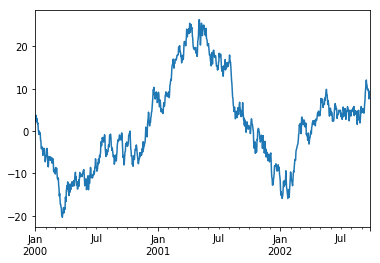

In [143]:
ts.plot()
plt.show()

In [144]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])

In [145]:
df = df.cumsum()

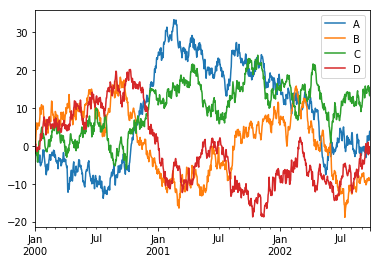

In [146]:
df.plot(); plt.legend(loc='best');plt.show() # 使用 ; 區隔, 將3個指令寫在一行

# 5.12 Getting Data In/Out 輸入/輸出資料

In [147]:
# 5.12.1 CSV

In [148]:
df.to_csv('foo.csv')

In [149]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.515421,1.046894,1.103273,-0.017596
1,2000-01-02,-0.879449,0.179941,-0.525108,0.472839
2,2000-01-03,-0.357084,2.333477,-0.788783,-0.221006
3,2000-01-04,-1.888479,3.726610,-2.157528,-1.063497
4,2000-01-05,-1.505090,5.505807,-1.412244,-0.724003
5,2000-01-06,-2.041952,6.041225,-1.904534,-1.192538
6,2000-01-07,-2.599241,5.097778,-2.848507,-1.532498
7,2000-01-08,-2.104231,4.368956,-4.323252,-1.061803
8,2000-01-09,-3.690357,5.455412,-3.344782,-0.485067
9,2000-01-10,-3.666496,5.436646,-2.689336,-0.342853


In [150]:
# 5.12.2 HDF5

In [151]:
df.to_hdf('foo.h5','df')

In [152]:
pd.read_hdf('foo.h5','df')

,A,B,C,D
2000-01-01,-1.515421,1.046894,1.103273,-0.017596
2000-01-02,-0.879449,0.179941,-0.525108,0.472839
2000-01-03,-0.357084,2.333477,-0.788783,-0.221006
2000-01-04,-1.888479,3.726610,-2.157528,-1.063497
2000-01-05,-1.505090,5.505807,-1.412244,-0.724003
2000-01-06,-2.041952,6.041225,-1.904534,-1.192538
2000-01-07,-2.599241,5.097778,-2.848507,-1.532498
2000-01-08,-2.104231,4.368956,-4.323252,-1.061803
2000-01-09,-3.690357,5.455412,-3.344782,-0.485067
2000-01-10,-3.666496,5.436646,-2.689336,-0.342853


In [153]:
# 5.12.3 Excel

In [154]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [155]:
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-1.515421,1.046894,1.103273,-0.017596
1,2000-01-02,-0.879449,0.179941,-0.525108,0.472839
2,2000-01-03,-0.357084,2.333477,-0.788783,-0.221006
3,2000-01-04,-1.888479,3.726610,-2.157528,-1.063497
4,2000-01-05,-1.505090,5.505807,-1.412244,-0.724003
5,2000-01-06,-2.041952,6.041225,-1.904534,-1.192538
6,2000-01-07,-2.599241,5.097778,-2.848507,-1.532498
7,2000-01-08,-2.104231,4.368956,-4.323252,-1.061803
8,2000-01-09,-3.690357,5.455412,-3.344782,-0.485067
9,2000-01-10,-3.666496,5.436646,-2.689336,-0.342853


In [156]:
# end